In [50]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


# Motive - To  Build a machine learning model which will take the feature of the record and predict about the condition of heart 

# Step by Step Process
   ## Load the Data from kaggle.com and convert into a pandas dataframe
   ## Import the necessary Dependencies
   ## Data Cleaning -
   ###   * Look for any informalities in data like missing and duplicates in the data.
   ###   * standardize the columns names if necessary .
   ## Perform EDA -
   ###   * Study about the columns individually .
   ###   * Relationship among the columns .
   ###   * Relationship of the columns with the target columns 
   ###   * Remove any extra columns .
   ## Feature Engineering
   ###   Feature transform
   ####   * Removed outliers using Z-score .
   ####   * Encoded the categorical feature using OneHotEncoder by ColumnTransformer
   ####   * scaled the data using StandartScaler
   ###   Feature Selection
   ####   * feature related to the target variable given to the model.
   ## Model Training and Testinng
   ###  Bagging Classifier was used to train
   ####   * Logistic Regression whose accuracy was  around 80%
   ####   * Decision Tree whose accuracy was 81.15%
   ####   * Random Forest Classifier had the accuracy was 82.20% 
   ### Support machine vector model accuracy was 79.34 
   ## Model Selection
   ### * Hypertune the Random Forest Classifier using GridSearchCV
   ### Random Forest Classifier best score was 82.4%.
      We will have to hypertune the paramaters to furthermore increase the accuracy .

## importing the libraries

In [51]:
import pandas as pd,numpy as np,seaborn as sns
from matplotlib import pyplot as plt

In [52]:
from sklearn.compose import ColumnTransformer

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
from sklearn.preprocessing import OneHotEncoder

In [55]:
from sklearn.preprocessing import StandardScaler as ss

### loading the data from kaggle.com 

In [56]:
df=pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')

### EDA on dataset 

In [57]:
df.shape

(918, 12)

In [58]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [59]:
df.duplicated().sum()

0

### there are no missing values or duplicates in the data

In [60]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## the HeartDisease is our target variable which tells about the person heart disease status
## Now we will do some more analysis on columns and try to select the columns which are more relevent to target .

In [61]:
df.corr()['HeartDisease']

Age             0.282039
RestingBP       0.107589
Cholesterol    -0.232741
FastingBS       0.267291
MaxHR          -0.400421
Oldpeak         0.403951
HeartDisease    1.000000
Name: HeartDisease, dtype: float64

## Cholesterol and Max heart rate are inversely proportional to target variable as decrease the chances of having heart disease increases.
## Oldpeak,fasting blood sugar,age are correlated to the target variable.

## Univariate analysis and Bivariate analysis

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sex', ylabel='count'>

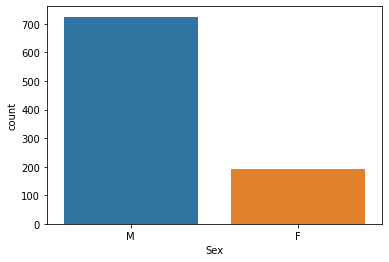

In [62]:
sns.countplot(df.Sex)

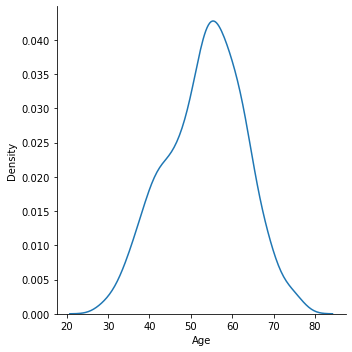

In [63]:
sns.displot(df.Age,kind='kde')

(array([173.,  55., 422., 239.,  21.,   4.,   4.]),
 array([  0.        ,  86.14285714, 172.28571429, 258.42857143,
        344.57142857, 430.71428571, 516.85714286, 603.        ]),
 <BarContainer object of 7 artists>)

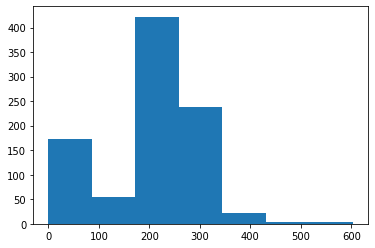

In [64]:
plt.hist(df.Cholesterol,bins=7)
#plt.hist(df.Age,bins=7)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Cholesterol', ylabel='MaxHR'>

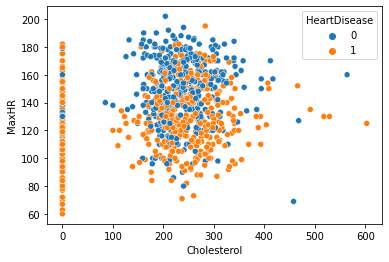

In [65]:
sns.scatterplot('Cholesterol','MaxHR',hue='HeartDisease',data=df)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='FastingBS', ylabel='Age'>

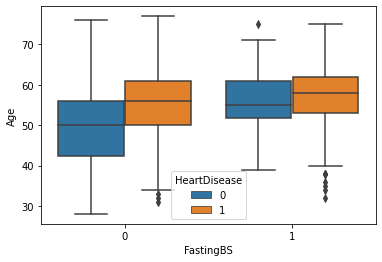

In [66]:
sns.boxplot('FastingBS','Age',data=df,hue='HeartDisease')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sex', ylabel='Cholesterol'>

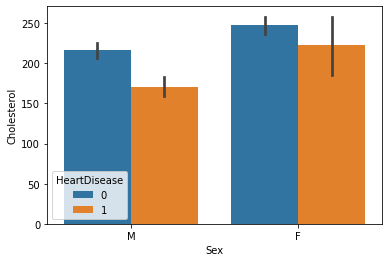

In [67]:
sns.barplot('Sex','Cholesterol',hue='HeartDisease',data=df)

In [68]:
df.groupby('ST_Slope')['HeartDisease'].value_counts(normalize=True)

ST_Slope  HeartDisease
Down      1               0.777778
          0               0.222222
Flat      1               0.828261
          0               0.171739
Up        0               0.802532
          1               0.197468
Name: HeartDisease, dtype: float64

In [69]:
df.groupby('ChestPainType')['HeartDisease'].sum()

ChestPainType
ASY    392
ATA     24
NAP     72
TA      20
Name: HeartDisease, dtype: int64

<AxesSubplot:xlabel='ChestPainType', ylabel='HeartDisease'>

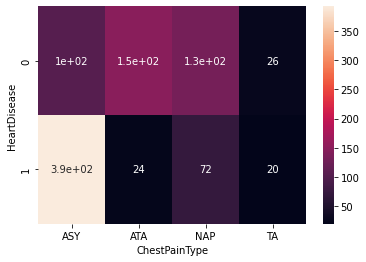

In [127]:
sns.heatmap(pd.crosstab(df['HeartDisease'],df['ChestPainType']),)

## based on the above analysis ,we will now do feature engineering on relevent columns and remove the other columns for better speed and performance of model.

In [71]:
#made a new dataframe with only relevent columns for our model
df=df.drop(['RestingBP','ST_Slope','ExerciseAngina','RestingECG'],axis=1)

## Feature Engineering

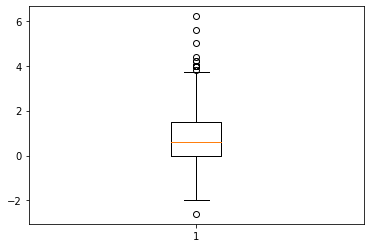

In [72]:
plt.boxplot(df.Oldpeak)
plt.show()


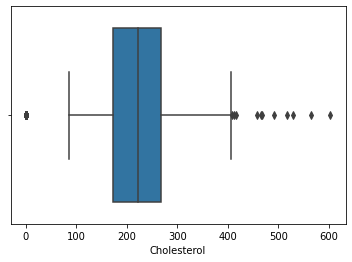

In [73]:
sns.boxplot(x='Cholesterol',data=df)
plt.show()

### As we can see in the box plot there are outliers in 'Cholesterol' and 'Oldpeak' .First we will calculate the z-score and then we will only retain the values which are in range of -3 to +3 z score.

In [74]:
import scipy.stats as stats

In [75]:
df[['z_cholesterol','z_oldpeak']]=stats.zscore(df[['Cholesterol','Oldpeak']])


In [76]:
df1=df[(df.z_cholesterol <abs(3) & (df.z_oldpeak<abs(3)))]


In [77]:
df1.drop(['z_cholesterol','z_oldpeak'],axis=1,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### spliting the data into train and test where X=train data,y=target data

In [78]:
X=df1.drop('HeartDisease',axis=1)

In [79]:
y=df1.HeartDisease

In [80]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

### Sex and ChestPainType are categorical data and need to be encoded .We wil use One Hot Encoder method.

In [81]:
df.ChestPainType.nunique()

4

In [82]:
#we will be using column transformer
transform=ColumnTransformer(transformers=[('tnf',OneHotEncoder(sparse=False,drop='first'),['Sex','ChestPainType'])],remainder='passthrough')

In [83]:
Xn_train=transform.fit_transform(X_train)
Xn_test=transform.transform(X_test)

 ## scaling the data features

In [84]:
scaler=ss()
scaler.fit(Xn_train)

StandardScaler()

In [85]:
Xtrain_scaled=scaler.transform(Xn_train)
Xtest_scaled=scaler.transform(Xn_test)

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
lr=LogisticRegression()

In [88]:
lr.fit(Xtrain_scaled,y_train)

LogisticRegression()

In [89]:
lr.score(Xtest_scaled,y_test)

0.7844311377245509

In [90]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(Xtrain_scaled,y_train)
svc.score(Xtest_scaled,y_test)

0.7724550898203593

In [91]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
dt=DecisionTreeClassifier()


In [93]:
from sklearn.ensemble import BaggingClassifier

In [94]:
bag_model=BaggingClassifier(base_estimator=dt,n_estimators=30,max_samples=0.75,oob_score=True)

In [95]:
bag_model.fit(Xtrain_scaled,y_train)
bag_model.score(Xtest_scaled,y_test)

0.7844311377245509

In [96]:
bag_model.oob_score_

0.7856071964017991

In [97]:
bag_lr=BaggingClassifier(base_estimator=lr,n_estimators=30,max_samples=0.75,oob_score=True)

In [98]:
bag_lr.fit(Xtrain_scaled,y_train)
bag_lr.score(Xtest_scaled,y_test)

0.7904191616766467

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
rvc=RandomForestClassifier()
bag_rvc=BaggingClassifier(base_estimator=rvc,n_estimators=40,max_samples=0.7)

In [101]:
bag_rvc.fit(Xtrain_scaled,y_train)
bag_rvc.score(Xtest_scaled,y_test)

0.7964071856287425

##  Hyper Tuning using GridSearchCv

In [102]:
from sklearn.model_selection import GridSearchCV as gsv

In [123]:
gsv_rsv_model=gsv(rvc,{
    'n_estimators':[40,30,45,35],
    'max_samples':[0.7,0.5,0.8,1]
},cv=5)

In [124]:
gsv_rsv_model.fit(Xtrain_scaled,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_samples': [0.7, 0.5, 0.8, 1],
                         'n_estimators': [40, 30, 45, 35]})

In [125]:
gsv_rsv_model.best_score_

0.8245875883739199

In [126]:
gsv_rsv_model.best_params_

{'max_samples': 0.8, 'n_estimators': 45}